<a href="https://colab.research.google.com/github/mickeey2525/digdagDocker/blob/master/Full_Scrach_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show>

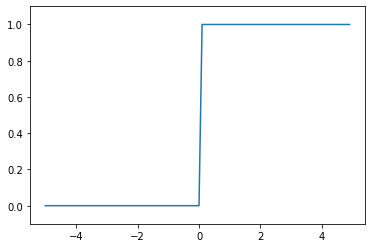

In [0]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x >0, dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show

シグモイド関数


ニューラルネットワークでよく用いられる活性化関数の一つ
# $$
  h(x) = 1 / (1 + exp(-x))
$$

ネイピア数についてはwikiを参照すること
https://ja.wikipedia.org/wiki/%E3%83%8D%E3%82%A4%E3%83%94%E3%82%A2%E6%95%B0

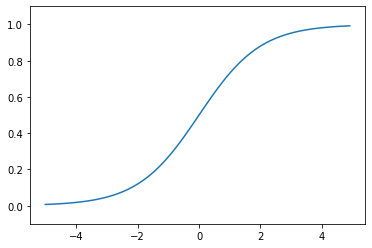

In [0]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

# ReLU関数
入力が0を超えていればその数値をそのまま出力する関数



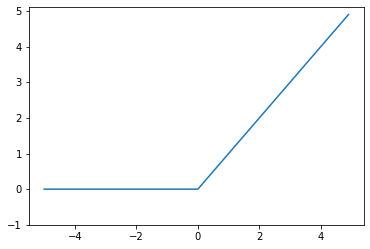

In [0]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0,5,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1,5.1)
plt.show()

# 多次元配列とは

簡単にいえば**数字の集合のこと**

数学ではなくCS用語  
詳細については以下のwikiを参照  
https://ja.wikipedia.org/wiki/%E9%85%8D%E5%88%97



In [2]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
np.ndim(A)
A.shape
A.shape[0]

[1 2 3 4]


4

配列の次元数はnp.ndimで取得可能。  
配列の形状はインスタンス変数のshapeから取得可能


### 2次元配列

In [3]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [0]:
np.ndim(B)

2

In [0]:
B.shape

(3, 2)

### 行列の積

In [0]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [0]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [0]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

### 多次元配列の積の注意点

行列の形状に注意。
具体的には行列Aの1次元目の要素数(列数)と行列Bの0次元目の要素数(行数）を一致させる必要がある。

2 * 3の行列Aと 3 * 2の行列B 

In [5]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [6]:
np.dot(A,C)

ValueError: ignored

In [7]:
X= np.array([1,2])
X.shape

(2,)

In [8]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [9]:
W.shape

(2, 3)

In [10]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


In [0]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [13]:
A1 = np.dot(X,W1) + B1
print(A1)

[0.3 0.7 1.1]


# 3層のニューラルネットワークの実装まとめ


In [20]:
import numpy as np

def identity_function(x):
  return x

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x):
  W1,W2,W3 = network['W1'], network['W2'], network['W3']
  b1,b2,b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y


network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


# ソフトマックス関数
$$
  y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i) \quad}
$$


ソフトマックス関数をPC上で扱う時はオーバーフローに気をつける。
性質としてソフトマックス関数の計算内で何らかの定数の足し算（もしくは引き算）を行ったところで計算結果に差異はでないので、それを利用する。

In [0]:
import numpy as np

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a -c ) #オーバーフロー対策
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [22]:
print(os.getcwd())

/content


In [37]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import sys, os
os.listdir(path='./gdrive/My Drive/Colab Notebooks/dataset/')



['lena.png', 'mnist.py', '__init__.py', 'lena_gray.png']

In [0]:
sys.path.append('./gdrive/My Drive/Colab Notebooks/')

In [0]:
from dataset.mnist import load_mnist

In [47]:
(x_train, t_train), (x_test,t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [48]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [52]:
from PIL import Image

def img_show(img):
  pil_image = Image.fromarray(np.uint8(img))
  pil_image.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)
